<ipython-input-6-005df947fa38>:51: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


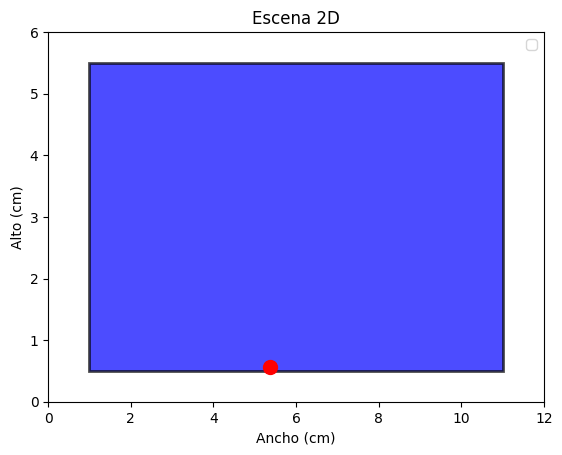

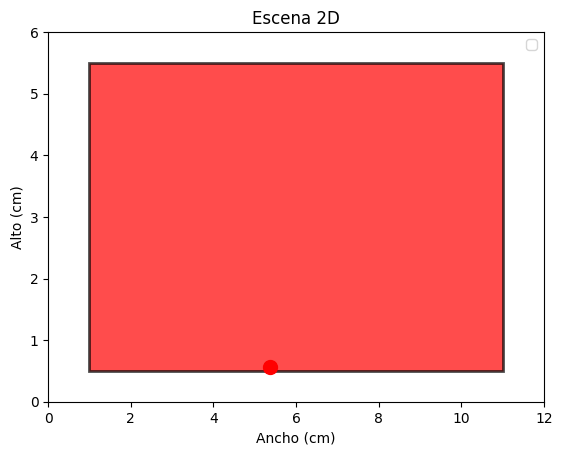

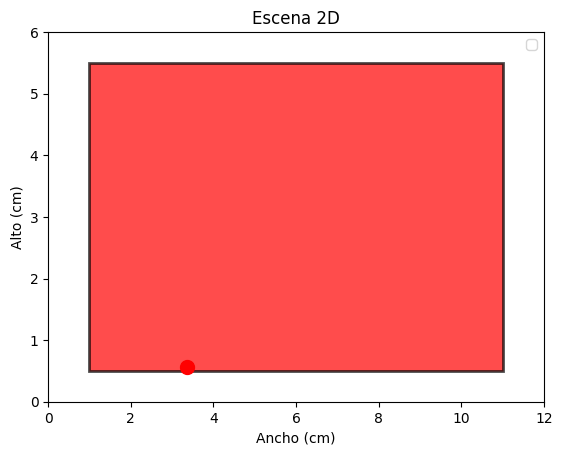

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

class Escena:
    def __init__(self, ancho_cm, alto_cm, color_rectangulo):

        self.ancho = ancho_cm
        self.alto = alto_cm
        self.color_rectangulo = color_rectangulo
        self.punto = np.random.rand(2) * [ancho_cm, alto_cm]  # Generar un punto aleatorio dentro del rectángulo

    def crear_escena(self, ancho_cm, alto_cm, color_rectangulo):

        self.ancho = ancho_cm
        self.alto = alto_cm
        self.color_rectangulo = color_rectangulo
        self.punto = np.random.rand(2) * [ancho_cm, alto_cm]  # Generar un nuevo punto aleatorio

    def cambiar_escena(self, nuevo_ancho_cm=None, nuevo_alto_cm=None, nuevo_color_rectangulo=None):

        if nuevo_ancho_cm is not None:
            self.ancho = nuevo_ancho_cm
        if nuevo_alto_cm is not None:
            self.alto = nuevo_alto_cm
        if nuevo_color_rectangulo is not None:
            self.color_rectangulo = nuevo_color_rectangulo

    def dibujar_escena(self):

        margen_x = self.ancho * 0.2
        margen_y = self.alto * 0.2

        fig, ax = plt.subplots()
        ax.set_xlim(0, self.ancho + margen_x)
        ax.set_ylim(0, self.alto + margen_y)

        # Dibujar el rectángulo
        rect = plt.Rectangle((margen_x / 2, margen_y / 2), self.ancho, self.alto,
                             facecolor=self.color_rectangulo, edgecolor='black', linewidth=2, alpha=0.7)
        ax.add_patch(rect)

        # Dibujar el punto dentro del rectángulo
        ax.scatter(self.punto[0] + (margen_x / 2), self.punto[1] + (margen_y / 2),
                   color='red', marker='o', s=100)

        ax.set_xlabel("Ancho (cm)")
        ax.set_ylabel("Alto (cm)")
        ax.set_title("Escena 2D")
        ax.legend()
        plt.grid(False)
        plt.show()

    def desplazar_punto(self, x, direccion):

        desplazamiento = np.array([0, 0])  # Inicializamos el desplazamiento

        if direccion == 'derecha':
            desplazamiento[0] = x
        elif direccion == 'izquierda':
            desplazamiento[0] = -x
        elif direccion == 'arriba':
            desplazamiento[1] = x
        elif direccion == 'abajo':
            desplazamiento[1] = -x
        else:
            print("Dirección no válida.")
            return

        # Aplicar el desplazamiento y asegurar que el punto se mantenga dentro del rectángulo
        self.punto = np.clip(self.punto + desplazamiento, [0, 0], [self.ancho, self.alto])

    def simular(self, velocidad, direccion):

      fig, ax = plt.subplots()
      ax.set_xlim(0, self.ancho)
      ax.set_ylim(0, self.alto)

      # Dibujar el rectángulo en la animación
      rect = plt.Rectangle((0, 0), self.ancho, self.alto, facecolor=self.color_rectangulo, edgecolor='black', linewidth=2, alpha=0.7)
      ax.add_patch(rect)

      # Dibujar el punto en la animación
      scatter = ax.scatter(self.punto[0], self.punto[1], color='red', s=100)

      # Inicializar dirección de movimiento como una lista mutable
      desplazamiento = [0, 0]

      if direccion == 'derecha':
          desplazamiento[0] = velocidad
      elif direccion == 'izquierda':
          desplazamiento[0] = -velocidad
      elif direccion == 'arriba':
          desplazamiento[1] = velocidad
      elif direccion == 'abajo':
          desplazamiento[1] = -velocidad
      else:
          print("Dirección no válida.")
          return

      def actualizar(frame):

          # Actualizar posición
          self.punto[0] += desplazamiento[0]
          self.punto[1] += desplazamiento[1]

          # Verificar colisiones con los bordes y hacer que rebote
          if self.punto[0] >= self.ancho or self.punto[0] <= 0:
              desplazamiento[0] *= -1  # Rebote en eje X
          if self.punto[1] >= self.alto or self.punto[1] <= 0:
              desplazamiento[1] *= -1  # Rebote en eje Y

          # Actualizar la posición del punto
          scatter.set_offsets([self.punto[0], self.punto[1]])
          return scatter,

      # Crear la animación
      ani = animation.FuncAnimation(fig, actualizar, frames=100, interval=50, blit=False)

      # Guardar la animación en video HTML para Google Colab
      video = ani.to_html5_video()
      plt.close(fig)  # Cerrar la figura para evitar errores en Colab

      from IPython.display import HTML
      return HTML(video)  # Mostrar la animación en Google Colab



escena = Escena(10, 5, 'blue')
escena.dibujar_escena()
escena.cambiar_escena(nuevo_color_rectangulo='red')
escena.dibujar_escena()
escena.desplazar_punto(2, 'izquierda')
escena.dibujar_escena()
escena.simular(0.3, 'derecha')